Epoch 0: Loss = 7.2084
Epoch 10: Loss = 0.0096
Epoch 20: Loss = 0.0098
Epoch 30: Loss = 0.0096
Epoch 40: Loss = 0.0095
Epoch 50: Loss = 0.0095
Epoch 60: Loss = 0.0098
Epoch 70: Loss = 0.0099
Epoch 80: Loss = 0.0096
Epoch 90: Loss = 0.0097


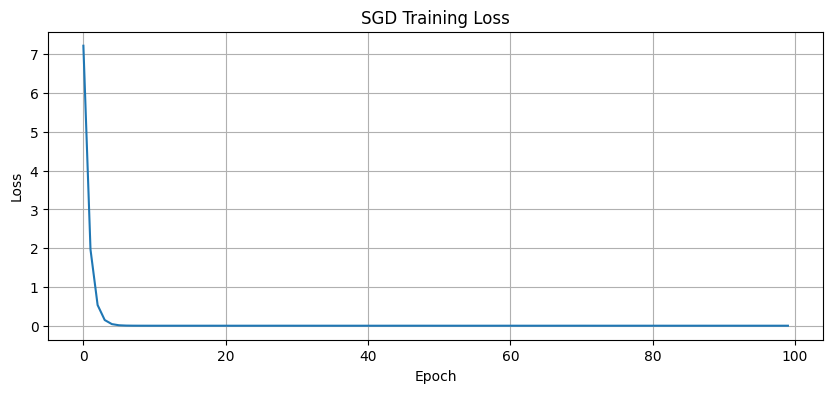

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SGDRegressor:
    def __init__(self, n_features, lr=0.01, n_epochs=100):
        self.W = np.random.randn(n_features, 1) * 0.01
        self.b = np.zeros(1)
        self.lr = lr
        self.n_epochs = n_epochs
        self.losses = []
    
    def loss(self, y_pred, y_true):
        """均方误差损失"""
        return np.mean((y_pred - y_true) ** 2)
    
    def fit(self, X, y, batch_size=32):
        """训练模型"""
        n_samples = X.shape[0]
        
        for epoch in range(self.n_epochs):
            # 随机打乱数据
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            epoch_loss = 0
            
            for i in range(0, n_samples, batch_size):
                # 获取小批量
                batch_end = min(i + batch_size, n_samples)
                X_batch = X_shuffled[i:batch_end]
                y_batch = y_shuffled[i:batch_end]
                
                # 前向传播
                y_pred = X_batch @ self.W + self.b
                batch_loss = self.loss(y_pred, y_batch)
                
                # 计算梯度
                error = y_pred - y_batch
                grad_W = (2 / batch_size) * X_batch.T @ error
                grad_b = (2 / batch_size) * np.sum(error)
                
                # SGD更新
                self.W -= self.lr * grad_W
                self.b -= self.lr * grad_b
                
                epoch_loss += batch_loss
            
            avg_loss = epoch_loss / (n_samples / batch_size)
            self.losses.append(avg_loss)
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Loss = {avg_loss:.4f}")
    
    def predict(self, X):
        """预测"""
        return X @ self.W + self.b

# 生成示例数据
np.random.seed(42)
X = np.random.randn(1000, 10)  # 1000个样本，10个特征
true_W = np.random.randn(10, 1)
true_b = 2.5
y = X @ true_W + true_b + np.random.randn(1000, 1) * 0.1

# 训练模型
model = SGDRegressor(n_features=10, lr=0.01, n_epochs=100)
model.fit(X, y, batch_size=32)

# 绘制损失曲线
plt.figure(figsize=(10, 4))
plt.plot(model.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SGD Training Loss')
plt.grid(True)
plt.show()